In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_heart = pd.read_csv("processed_cleveland.csv")
df_heart

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
# Giving the column names as the dataset does not have the proper names of the columns for easy understandig.

df_heart.columns=['Age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df_heart.columns

Index(['Age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
# Let's check the dataset again.

df_heart.head()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [5]:
# Checking the shape of the dataset

df_heart.shape

(302, 14)

In [6]:
# checking the data types of each feature. 

df_heart.dtypes

Age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

The dataset contains 11 columns having 'float64', 1 column as 'int64' and 2 columns having 'object' data type.

In [7]:
# Let's  check the value counts of the target variable.

df_heart.target.value_counts() 

0    163
1     55
2     36
3     35
4     13
Name: target, dtype: int64

From below, we can observe that the target variable has 5 categories in total.

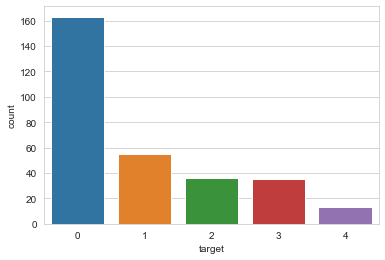

In [8]:
# Visualizing the count of people having and not having the heart disease in target vraiable.
sns.set_style("whitegrid")
sns.countplot(x="target",data=df_heart)
plt.show()

In [9]:
# Replacing the target variable categories 1,2,3,4 with 1 inorder to have the two categoreies in the target variable as representing : 
# 0 = people with no heart disease and 1 = people with heart disease.
# Checking the value counts after replacing.

df_heart['target'] = df_heart.target.replace({0:0, 1:1, 2:1, 3:1, 4:1})
df_heart.target.value_counts()

0    163
1    139
Name: target, dtype: int64

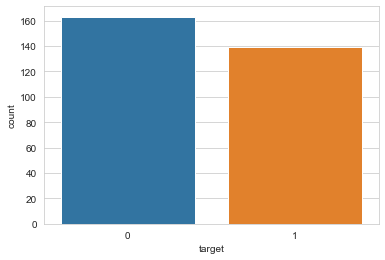

In [10]:
# Visualizing the count of people having and not having the heart disease in target vraiable.
sns.set_style("whitegrid")
sns.countplot(x="target",data=df_heart)
plt.show()

The count of people having no heart disease is more than the ones having the heart disease.

In [11]:
# Again check the head of the dataset.

df_heart.head()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [12]:
# Let's use the describe function to check the statistical summary of the dataset.

df_heart.describe()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.460265
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.499246
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Observations from above :
    
    1. The median of "Age", "Sex", "thalach" and "slope" is greater than the mean.
    2. There are few outliers present in the dataset, like in "chol".
    3. Except the "Age" having rang 9-77, "trestbps" and "chol" having range 17-564, the range of other features is between 0-2.
    4. The std of "thalach" and "chol" is high as compared to other variable, which shows the slope is flatten because of the wide range.

In [13]:
# Let's check the null values.

df_heart.isnull().sum()

Age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

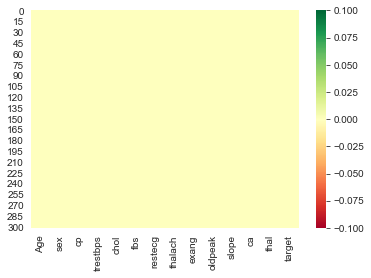

In [14]:
# Visualizationn of null values using heatmap.

sns.heatmap(df_heart.isnull(), cmap = "RdYlGn")

Thus, from above , it is clear that there are no null values present in the dataset.

In [15]:
# Let's see the correlation.

df_heart.corr()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
Age,1.000000,-0.099925,0.112326,0.283257,0.210120,0.112245,0.146142,-0.394448,0.094065,0.201083,0.156199,0.226668
sex,-0.099925,1.000000,0.015342,-0.066292,-0.199492,0.042863,0.019386,-0.048740,0.148019,0.099976,0.032671,0.279518
cp,0.112326,0.015342,1.000000,-0.030717,0.070950,-0.022524,0.075854,-0.337136,0.382394,0.212589,0.171926,0.411625
trestbps,0.283257,-0.066292,-0.030717,1.000000,0.130924,0.171127,0.144395,-0.045437,0.066627,0.186987,0.112752,0.153496
chol,0.210120,-0.199492,0.070950,0.130924,1.000000,0.012058,0.172249,-0.003417,0.060755,0.047617,-0.002085,0.084485
fbs,0.112245,0.042863,-0.022524,0.171127,0.012058,1.000000,0.062202,-0.008067,0.031514,-0.002907,0.042630,0.032923
restecg,0.146142,0.019386,0.075854,0.144395,0.172249,0.062202,1.000000,-0.083591,0.087432,0.110879,0.127603,0.172840
thalach,-0.394448,-0.048740,-0.337136,-0.045437,-0.003417,-0.008067,-0.083591,1.000000,-0.378368,-0.343821,-0.389078,-0.417701
exang,0.094065,0.148019,0.382394,0.066627,0.060755,0.031514,0.087432,-0.378368,1.000000,0.291536,0.265491,0.430721
oldpeak,0.201083,0.099976,0.212589,0.186987,0.047617,-0.002907,0.110879,-0.343821,0.291536,1.000000,0.575415,0.429268


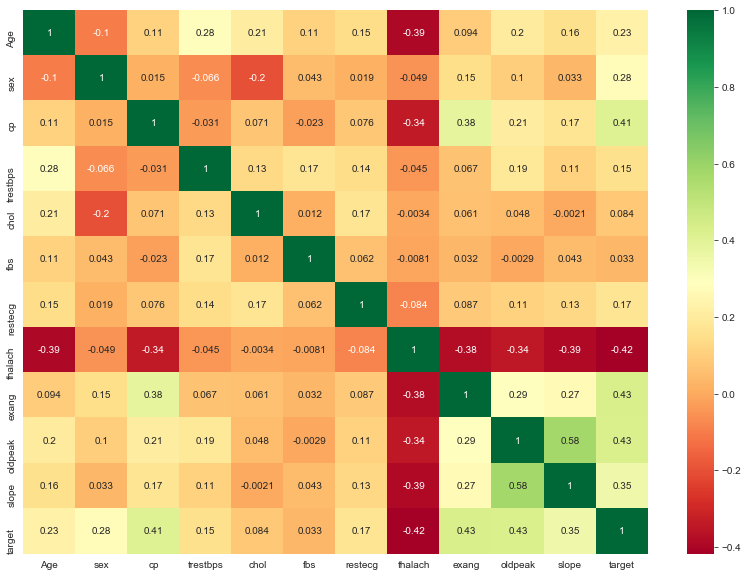

In [16]:
# Visualizing the correlation amaong the variables.

plt.figure(figsize=(14,10))
sns.heatmap(df_heart.corr(), cmap= "RdYlGn", annot= True)

Observations from above :
    1. The "thalach" is having a negative correlation with each and every variable.
    2. "Slope" and "oldpeak" are highly positively correlated as compared to other variables.
    3. There is a good positive correlation of "cp", "exang", "oldpeak", "slope" with "target" variable.
    4. Only "thalach" is having a negative correlation with thee "target" variable.

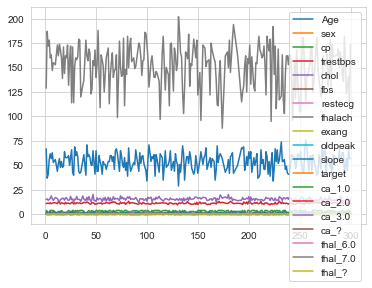

In [38]:
# Visualizing the whole data using line plot.

df_heart.plot.line()

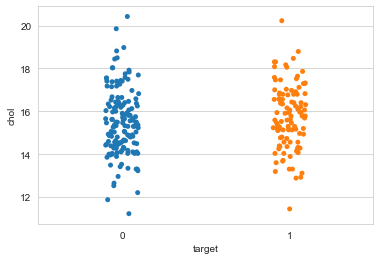

In [39]:
# relationship between chol with the target variable.
sns.stripplot(x = 'target', y = 'chol', data = df_heart, jitter = True)

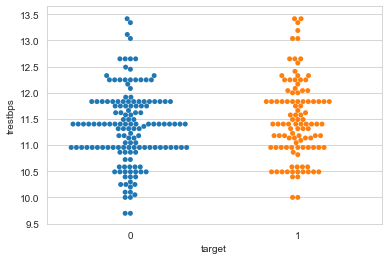

In [40]:
ax=sns.swarmplot(x="target",y="trestbps", data = df_heart)
plt.show()

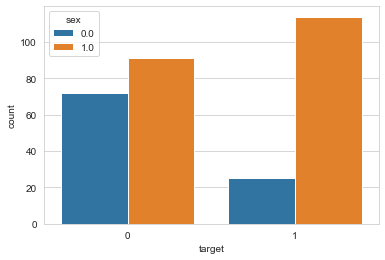

In [17]:
sns.set_style("whitegrid")
sns.countplot(x="target", hue="sex", data=df_heart)
plt.show()

 Here 0 = female and 1 = male.
 The males have heart disease as compared to females. There is a huge difference.

In [18]:
# Let's  make a list of numerical data.

heart_num = df_heart.select_dtypes(exclude='object')
heart_num.head()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0


In [19]:
# Let's  make a list of categorical data.

heart_cat = df_heart.select_dtypes(include='object')
heart_cat.columns

Index(['ca', 'thal'], dtype='object')

In [20]:
# Creating the dummies for the categorical columns.

heart_cat_final = pd.get_dummies(heart_cat,drop_first=True)
heart_cat_final.head()

,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_6.0,thal_7.0,thal_?
0,0,0,1,0,0,0,0
1,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [21]:
# Concatinating the dummie variables with numerical column and making a final clolumn list.

df_heart = pd.concat([heart_num,heart_cat_final], axis = 1)
df_heart.head()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_6.0,thal_7.0,thal_?
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1,0,0,1,0,0,0,0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1,0,1,0,0,0,1,0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0,0,0,0,0,0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0,0,0,0,0,0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0,0,0,0,0,0,0,0


In [22]:
# Lets check the skewness of dataset.
df_heart.skew()

Age         -0.203026
sex         -0.769709
cp          -0.845849
trestbps     0.713008
chol         1.131463
fbs          2.018566
restecg      0.026623
thalach     -0.536399
exang        0.737281
oldpeak      1.281701
slope        0.503687
target       0.160242
ca_1.0       1.392718
ca_2.0       2.267672
ca_3.0       3.506123
ca_?         8.558047
thal_6.0     3.869487
thal_7.0     0.464511
thal_?      12.226611
dtype: float64

In [23]:
for col in df_heart.columns:
    if df_heart.skew().loc[col]>0.55:
        df_heart[col]=np.sqrt(df_heart[col])

In [24]:
df_heart.skew()

Age         -0.203026
sex         -0.769709
cp          -0.845849
trestbps     0.495009
chol         0.551057
fbs          2.018566
restecg      0.026623
thalach     -0.536399
exang        0.737281
oldpeak      0.167711
slope        0.503687
target       0.160242
ca_1.0       1.392718
ca_2.0       2.267672
ca_3.0       3.506123
ca_?         8.558047
thal_6.0     3.869487
thal_7.0     0.464511
thal_?      12.226611
dtype: float64

In [25]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore
z = np.abs(zscore(df_heart))
print(z.shape)
df_heart = df_heart.loc[(z<3).all(axis=1)]
print(df_heart.shape)

(302, 19)
(257, 19)


By comparing shape of 'z' and 'df_heart' shape , 45 rows have been removed as outliers.

The data cleaning is done.

In [26]:
# Separating the input and target variables

X =df_heart.drop(columns=["target"])
y =df_heart[["target"]]

In [27]:
print(X.shape)
print(y.shape)

(257, 18)
(257, 1)


In [28]:
X.head()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_6.0,thal_7.0,thal_?
1,67.0,1.0,4.0,10.954451,15.132746,0.0,2.0,129.0,1.0,1.612452,2.0,0.0,1.0,0.0,0.0,0.0,1,0.0
2,37.0,1.0,3.0,11.401754,15.811388,0.0,0.0,187.0,0.0,1.870829,3.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,41.0,0.0,2.0,11.401754,14.282857,0.0,2.0,172.0,0.0,1.183216,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,56.0,1.0,2.0,10.954451,15.362291,0.0,0.0,178.0,0.0,0.894427,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
5,62.0,0.0,4.0,11.832160,16.370706,0.0,2.0,160.0,0.0,1.897367,3.0,0.0,1.0,0.0,0.0,0.0,0,0.0


In [29]:
y.head()

,target
1,1
2,0
3,0
4,0
5,1


In [30]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.44415294,  0.72784745,  0.92194922, ...,  0.        ,
         1.25299641,  0.        ],
       [-1.87163598,  0.72784745, -0.10822882, ...,  0.        ,
        -0.79808688,  0.        ],
       [-1.42953079, -1.37391428, -1.13840686, ...,  0.        ,
        -0.79808688,  0.        ],
       ...,
       [ 1.55467924,  0.72784745,  0.92194922, ...,  0.        ,
         1.25299641,  0.        ],
       [ 0.33888997,  0.72784745,  0.92194922, ...,  0.        ,
         1.25299641,  0.        ],
       [ 0.33888997, -1.37391428, -1.13840686, ...,  0.        ,
        -0.79808688,  0.        ]])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve,auc, confusion_matrix

def m (clf ,X, y):
    max_acc_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_scr = accuracy_score(pred, y_test)
        if acc_scr > max_acc_scr:
            max_acc_scr = acc_scr
            final_r_state = r_state
    
    print("Maximum accuracy score corresponding to", final_r_state, "is :", max_acc_scr)
    print("\n")
    print("Confusion Matrix :\n", confusion_matrix(pred, y_test))
    print("\n")
    print("Classification Report :\n", classification_report(pred, y_test))
    print("\n")
    false_positive_rate, true_positive_rate, threshold = roc_curve(pred, y_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_CURVE :", roc_auc)    

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [33]:
print("-------Logistic Regression-------")
lr = LogisticRegression()
r_state = m(lr, X, y)
print("\n")

print("-------GaussianNB-------")
gnb = GaussianNB()
r_state = m(gnb, X, y)
print("\n")

print("-------DecisionTreeClassifier-------")
dtc = DecisionTreeClassifier()
r_state = m(dtc, X, y)
print("\n")

print("-------SVC-------")
sv = SVC()
r_state = m(sv, X, y)
print("\n")

print("-------KNeighborsClassifier-------")
knnc = KNeighborsClassifier()
r_state = m(knnc, X, y)

-------Logistic Regression-------
Maximum accuracy score corresponding to 82 is : 0.9423076923076923


Confusion Matrix :
 [[23  5]
 [ 5 19]]


Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.79      0.79      0.79        24

    accuracy                           0.81        52
   macro avg       0.81      0.81      0.81        52
weighted avg       0.81      0.81      0.81        52



ROC_AUC_CURVE : 0.806547619047619


-------GaussianNB-------
Maximum accuracy score corresponding to 50 is : 0.9230769230769231


Confusion Matrix :
 [[23  8]
 [ 5 16]]


Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        31
           1       0.67      0.76      0.71        21

    accuracy                           0.75        52
   macro avg       0.74      0.75      0.75        52
weighted avg       0.76      0.75 

In [34]:
from sklearn.model_selection import cross_val_score

print("-------Cross Validation of Logistic Regression-------")
print("Cross validation score :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------Cross Validation of GaussianNB-------")
print("Cross validation score :", cross_val_score(gnb, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(gnb, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------Cross Validation of DecisionTreeClassifier-------")
print("Cross validation score :", cross_val_score(dtc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(dtc, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------Cross Validation of SVC-------")
print("Cross validation score :", cross_val_score(sv, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(sv, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------Cross Validation of KNeighborsClassifier-------")
print("Cross validation score :", cross_val_score(knnc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(knnc, X, y, cv=5, scoring = "accuracy").std())

-------Cross Validation of Logistic Regression-------
Cross validation score : 0.8248114630467571
Standard Deviationscore : 0.013413658931714346


-------Cross Validation of GaussianNB-------
Cross validation score : 0.8170437405731523
Standard Deviationscore : 0.0363757316874817


-------Cross Validation of DecisionTreeClassifier-------
Cross validation score : 0.7740573152337858
Standard Deviationscore : 0.06595737279824264


-------Cross Validation of SVC-------
Cross validation score : 0.8399698340874812
Standard Deviationscore : 0.05799225059096706


-------Cross Validation of KNeighborsClassifier-------
Cross validation score : 0.8285067873303167
Standard Deviationscore : 0.0347615515632218


In [35]:
# Thus creating the final model.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.20)
sv = SVC()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

In [36]:
# EVALUATING THE FINALIZED MODEL.

print("accuracy score :",accuracy_score(y_pred, y_test))
print("\n")
print("Confusion Matrix :\n", confusion_matrix(y_pred, y_test))
print("\n")
print("Classification Report :\n", classification_report(y_pred, y_test))
print("\n")
false_positive_rate, true_positive_rate, threshold = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC_AUC_CURVE :", roc_auc)     

accuracy score : 0.9615384615384616


Confusion Matrix :
 [[33  2]
 [ 0 17]]


Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.89      1.00      0.94        17

    accuracy                           0.96        52
   macro avg       0.95      0.97      0.96        52
weighted avg       0.97      0.96      0.96        52



ROC_AUC_CURVE : 0.9714285714285714


In [37]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(sv, 'sv_heart_disease.pkl')

['sv_heart_disease.pkl']